In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=37eea58ec3144a14247769e5ecacd1e2fad65fcc1f308d7cffcccc578c25bdb2
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
#Librerías
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

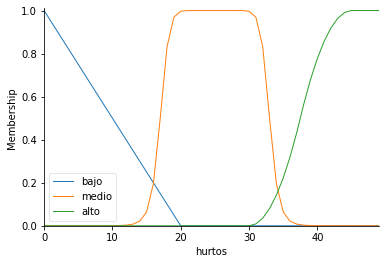

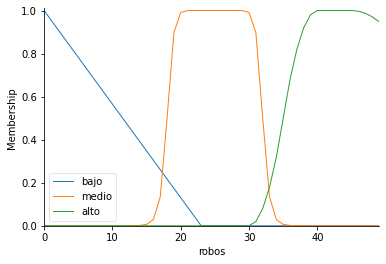

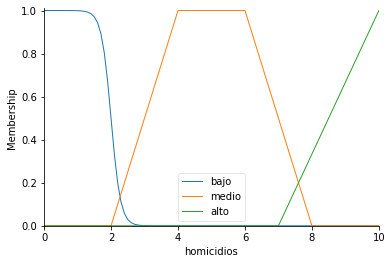

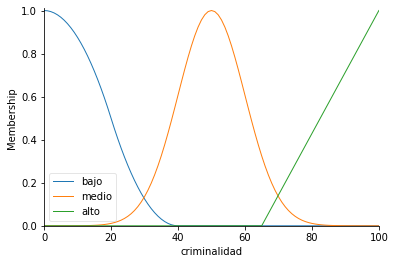

In [3]:
# Hurtos
hur = ctrl.Antecedent(np.arange(0, 50, 1), 'hurtos')

hur['bajo'] = fuzz.trimf(hur.universe, [0, 0, 20])
hur['medio'] = fuzz.gbellmf(hur.universe, 8, 6, 25)
hur['alto']  = fuzz.pimf(hur.universe, 30, 45, 50, 75)
hur.view()


# Robos
rob = ctrl.Antecedent(np.arange(0, 50, 1), 'robos')

rob['bajo'] = fuzz.trimf(rob.universe, [0, 0, 23])
rob['medio'] = fuzz.gbellmf(rob.universe, 7, 7, 25)
rob['alto']  = fuzz.pimf(rob.universe, 30, 40, 45, 70)
rob.view()

# Homicidios
hom = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'homicidios')

hom['bajo'] = fuzz.sigmf(hom.universe, 2, -7)
hom['medio'] = fuzz.trapmf(hom.universe, [2, 4, 6, 8])
hom['alto']  = fuzz.trimf(hom.universe, [7, 10, 10])
hom.view()


# Criminalidad
crim = ctrl.Consequent(np.arange(0, 101, 1), 'criminalidad')

crim['bajo'] = fuzz.zmf(crim.universe, 0, 40)
crim['medio'] = fuzz.gaussmf(crim.universe, 50, 10)
crim['alto']  = fuzz.trimf(crim.universe, [65, 100, 100])
crim.view()

In [9]:
# Reglas de inferencia
regla1 = ctrl.Rule(rob['bajo'] & hur['bajo'] & hom['bajo'], crim['bajo'])
regla2 = ctrl.Rule(rob['bajo'] & hur['bajo'] & hom['medio'], crim['medio'])
regla3 = ctrl.Rule(rob['bajo'] & hur['bajo'] & hom['alto'], crim['alto'])
regla4 = ctrl.Rule((rob['medio'] | hur['medio']) & hom['bajo'], crim['bajo'])
regla5 = ctrl.Rule((rob['medio'] | hur['medio']) & hom['medio'], crim['medio'])
regla6 = ctrl.Rule((rob['medio'] | hur['medio']) & hom['alto'], crim['alto'])
regla7 = ctrl.Rule((rob['alto'] | hur['alto']) & (hom['bajo'] ),  crim['medio'])
regla8 = ctrl.Rule((rob['alto'] | hur['alto']) & (hom['medio'] ),  crim['alto'])
regla9 = ctrl.Rule((rob['alto'] | hur['alto']) & (hom['alto'] ),  crim['alto'])

In [10]:
# Crea el sistema de control y simulación
crim_ctrl = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8, regla9])
crim_sim = ctrl.ControlSystemSimulation(crim_ctrl)

In [32]:
# Entrada
crim_sim.input['robos'] = 2
crim_sim.input['hurtos'] = 1
crim_sim.input['homicidios'] = 0

In [33]:
# Cálculo
crim_sim.compute()
crim_sim.output

OrderedDict([('criminalidad', 11.88180171369006)])

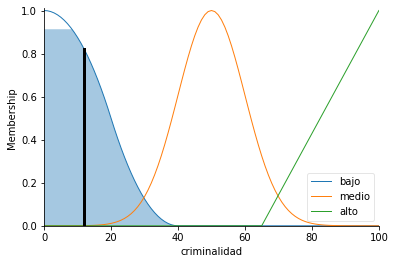

In [34]:
# Punto rpta
crim.view(sim=crim_sim)